# King County House Sales Regression Analysis
## Preprocessing and Exploring Data

* Student name: Spencer Hadel
* Student pace: Flex
* Scheduled project review date/time: 6/5/2022, 11:00am EST
* Instructor name: Claude Fried

### Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

### Import Prepared Data from kc_data_cleaning.ipynb

We have already cleaned the King County Housing Data in the kc_data_cleaning notebook:

[Data Cleaning Notebook](./kc_data_cleaning.ipynb)

We only need the cleaned_df dataframe from it, imported below:

In [2]:
df = pd.read_csv('./data/cleaned.csv', index_col = 0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21534 non-null  float64
 1   bedrooms        21534 non-null  int64  
 2   bathrooms       21534 non-null  float64
 3   sqft_living     21534 non-null  int64  
 4   sqft_lot        21534 non-null  int64  
 5   floors          21534 non-null  float64
 6   waterfront      21534 non-null  object 
 7   view            21534 non-null  object 
 8   condition       21534 non-null  object 
 9   grade           21534 non-null  object 
 10  yr_built        21534 non-null  int64  
 11  renovated_2000  21534 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.1+ MB


### Identifying Categorical Data

We need to find out which of the features contain categorical data. It is important to identify this because we want our model to be trained on normalized numerical values, not human concepts like condition scores. The most obvious categorical variables above are the ones where the dtype is an object. However, there are ints and floats that also pertain to categorical data, such as the number of bedrooms. 

We don't want our model predicting that a house's value will go up with the addition of 0.33 bedrooms, so we need to break down features like this into dummy variables. While we can look at the features and use common sense to identify categoricals, visualizing the data can also help with this, as seen below.

C:\Users\shade\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


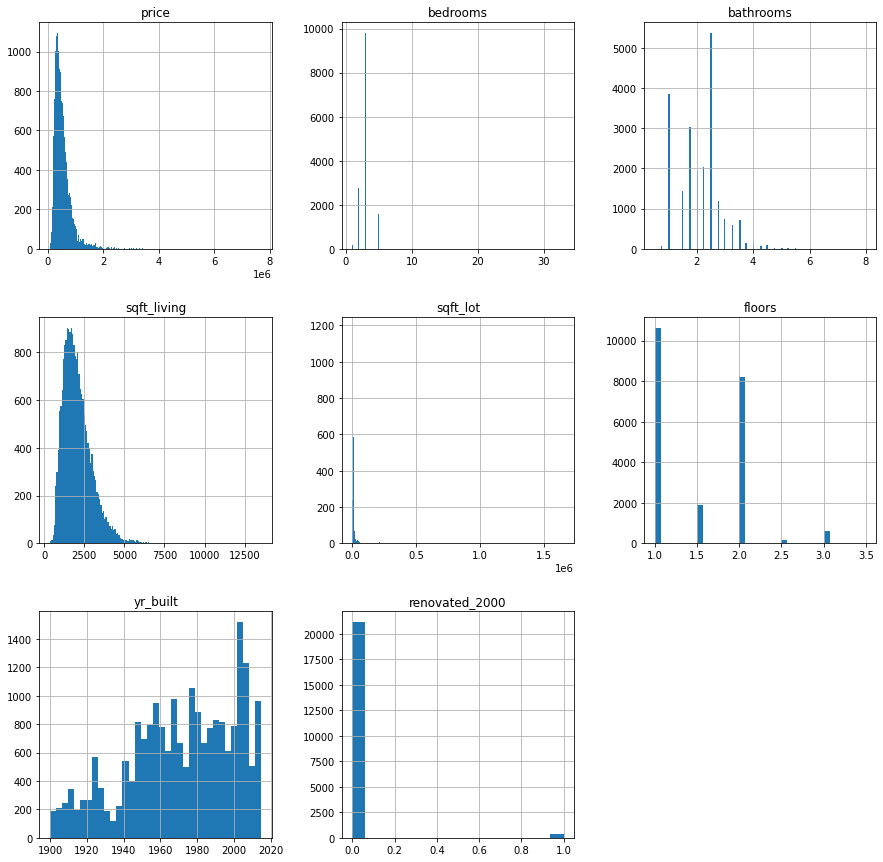

In [4]:
df.hist(figsize=[15,15], bins='auto');

Any feature that shows seperate individual columns of data clearly indicates that it is categorical. We create a new subset of the data composed of these features and the features that have a dtype of object.

We convert the new df to all strings in order to aid in the dummy creation process in the next step.

In [5]:
categorical_df = df[['bedrooms', 'bathrooms', 'floors', 'renovated_2000', 'grade',
        'condition', 'view', 'waterfront']].astype(str)

#### One-Hot Encoding Categoricals with Dummy Variables

We need to use one-hot encoding to split these features into data useable by our model. We create dummy variables for each potential variable of the categorical data.



In [6]:
dummies_df = pd.get_dummies(categorical_df, drop_first=True)
dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   bedrooms_10          21534 non-null  uint8
 1   bedrooms_11          21534 non-null  uint8
 2   bedrooms_2           21534 non-null  uint8
 3   bedrooms_3           21534 non-null  uint8
 4   bedrooms_33          21534 non-null  uint8
 5   bedrooms_4           21534 non-null  uint8
 6   bedrooms_5           21534 non-null  uint8
 7   bedrooms_6           21534 non-null  uint8
 8   bedrooms_7           21534 non-null  uint8
 9   bedrooms_8           21534 non-null  uint8
 10  bedrooms_9           21534 non-null  uint8
 11  bathrooms_0.75       21534 non-null  uint8
 12  bathrooms_1.0        21534 non-null  uint8
 13  bathrooms_1.25       21534 non-null  uint8
 14  bathrooms_1.5        21534 non-null  uint8
 15  bathrooms_1.75       21534 non-null  uint8
 16  bathrooms_2.0        2

We can see above that our categorical features has been successfully split into unique dummy variables.

### Continuous Data

The remaining features are continuous numerical data. 

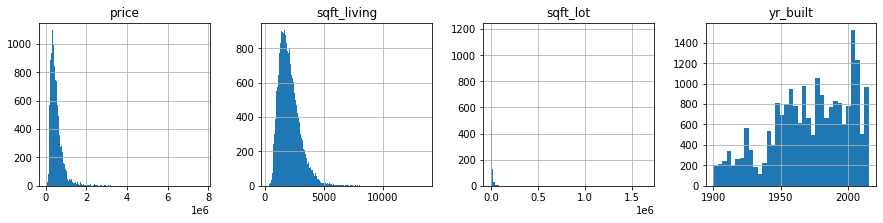

In [7]:
continuous_df = df[['price','sqft_living','sqft_lot', 'yr_built']]

continuous_df.hist(figsize=[15,3], bins='auto', layout=(1,4));

### Transforming and Standardizing Data

This data is extremely skewed, so we will use the log transform to make the data more normally distributed.

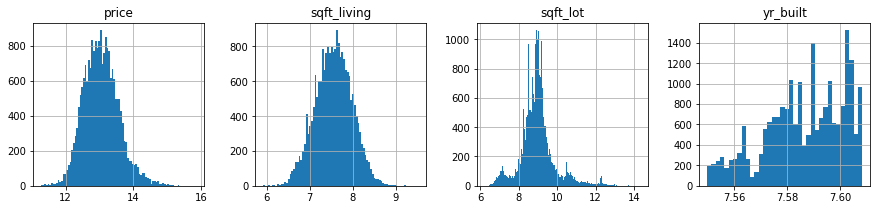

In [8]:
continuous_log = np.log(continuous_df)
continuous_log.hist(figsize=[15,3], bins='auto', layout=(1,4));

Now that the data has been transformed, we standardize it in order to properly scale the continuous features in relation to each other.

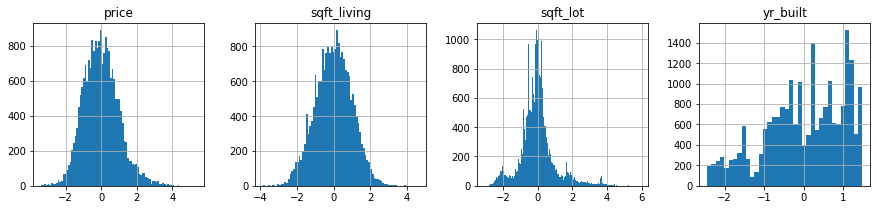

In [9]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
#normalize data

normalized_cont = continuous_log.apply(normalize)
normalized_cont.hist(figsize=[15,3], bins='auto', layout=(1,4));

## Exploring Data

Next we need to look through the data and create visualizations for each feature compared to our target variable, price.

### Linearity

We need to make sure that the target variable is linearly related to our input features. We use sns.jointplot() do do this to our continuous variables.

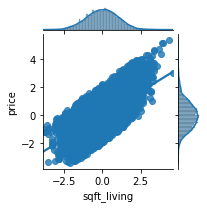

In [10]:
sns.jointplot(x='sqft_living',y='price', data=normalized_cont, kind='reg', height=3);

In [11]:
#Strong linear connection between sqft_living and price)

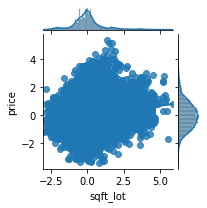

In [12]:
sns.jointplot(x='sqft_lot',y='price', data=normalized_cont, kind='reg', height=3);

In [13]:
#Much less evidence of linearity here, if any

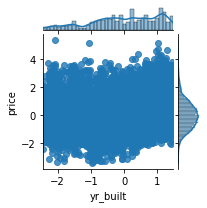

In [14]:
sns.jointplot(x='yr_built',y='price', data=normalized_cont, kind='reg', height=3);

In [15]:
#No recognizeable linear connection between yr_built and price.

Next, despite the fact that we changed certain features into categorical dummy variables, we will check the linearity of the numerical categoricals from the original dataframe.

We will do so by transforming and standardizing these features, just as we did with the continuous variables, and observing their jointplots as well.

C:\Users\shade\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


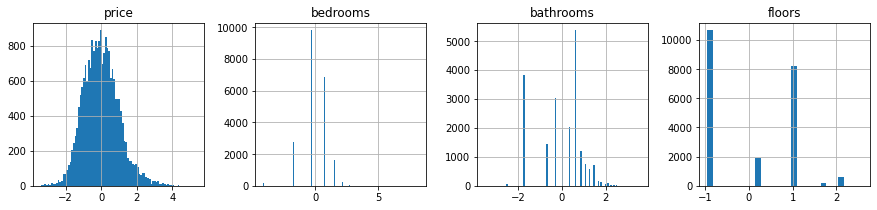

In [16]:
cat_as_cont = df[['price','bedrooms', 'bathrooms', 'floors']]

log_cat_as_cont = np.log(cat_as_cont)

norm_cat_cont = log_cat_as_cont.apply(normalize)
norm_cat_cont.hist(figsize=[15,3], bins='auto', layout=(1,4));

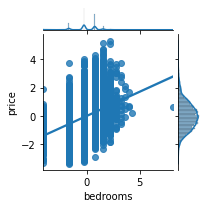

In [17]:
sns.jointplot(x='bedrooms',y='price', data=norm_cat_cont, kind='reg', height=3);

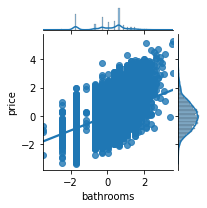

In [18]:
sns.jointplot(x='bathrooms',y='price', data=norm_cat_cont, kind='reg', height=3);

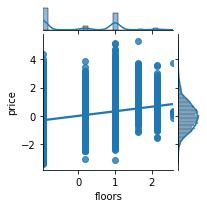

In [19]:
sns.jointplot(x='floors',y='price', data=norm_cat_cont, kind='reg', height=3);

### Multicollinearity
We check for multicollinearity between our predictive features by observing the pairwise correlation coefficients and visualizing them in a heatmap.

We will combine all our standardized continuous variables for this test.

In [20]:
test_df = pd.concat([norm_cat_cont, normalized_cont], axis=1)
test_df.drop(['price'], axis=1,inplace=True)
test_df.head()

,bedrooms,bathrooms,floors,sqft_living,sqft_lot,yr_built
0,-0.279405,-1.726477,-0.960735,-1.125162,-0.388111,-0.537482
1,-0.279405,0.339753,1.006703,0.709983,-0.112980,-0.674395
2,-1.710879,-1.726477,-0.960735,-2.131578,0.244661,-1.293998
3,0.736242,1.072760,-0.960735,0.071161,-0.523567,-0.196421
4,-0.279405,0.039645,-0.960735,-0.292266,0.008375,0.547844


In [21]:
corr = test_df.corr()
corr

,bedrooms,bathrooms,floors,sqft_living,sqft_lot,yr_built
bedrooms,1.000000,0.534130,0.212680,0.648039,0.196011,0.194355
bathrooms,0.534130,1.000000,0.510306,0.760650,0.084837,0.533087
floors,0.212680,0.510306,1.000000,0.393070,-0.212503,0.471678
sqft_living,0.648039,0.760650,0.393070,1.000000,0.326167,0.348830
sqft_lot,0.196011,0.084837,-0.212503,0.326167,1.000000,-0.005108
yr_built,0.194355,0.533087,0.471678,0.348830,-0.005108,1.000000


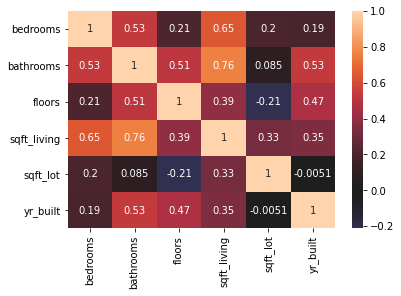

In [22]:
sns.heatmap(corr, center=0, annot=True);

### Final Preprocessed Dataset

We can tell from the above exploration that there are certainly at least some features with strong linearity compared to the price, as well as some features that show strong multicollinearity, which we will attempt to deal with in the next steps.

Finally, we combine the continuous and categorical features back into a final preprocessed dataset. This will be composed solely of the original preprocessed continuous variables, and the categorical dummies from before.

In [23]:
final_df = pd.concat([normalized_cont, dummies_df], axis=1)

final_df.describe()

,price,sqft_living,sqft_lot,yr_built,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,...,grade_9 Better,condition_Fair,condition_Good,condition_Poor,condition_Very Good,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,waterfront_YES
count,2.153400e+04,2.153400e+04,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,...,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,1.420162e-15,-2.956470e-15,-4.117941e-16,1.875247e-14,0.000139,0.000046,0.127891,0.454676,0.000046,0.318798,...,0.120925,0.007894,0.262701,0.001347,0.078806,0.014721,0.015325,0.023591,0.901923,0.006734
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.011803,0.006815,0.333976,0.497953,0.006815,0.466021,...,0.326048,0.088502,0.440111,0.036674,0.269441,0.120436,0.122843,0.151773,0.297426,0.081783
min,-3.388853e+00,-3.859443e+00,-3.032095e+00,-2.445072e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.949050e-01,-6.721235e-01,-5.147356e-01,-6.743950e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-5.897152e-02,1.023752e-02,-5.702629e-02,1.429089e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.250455e-01,6.915643e-01,3.183784e-01,8.834260e-01,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.336605e+00,4.627728e+00,5.904585e+00,1.483261e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\shade\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


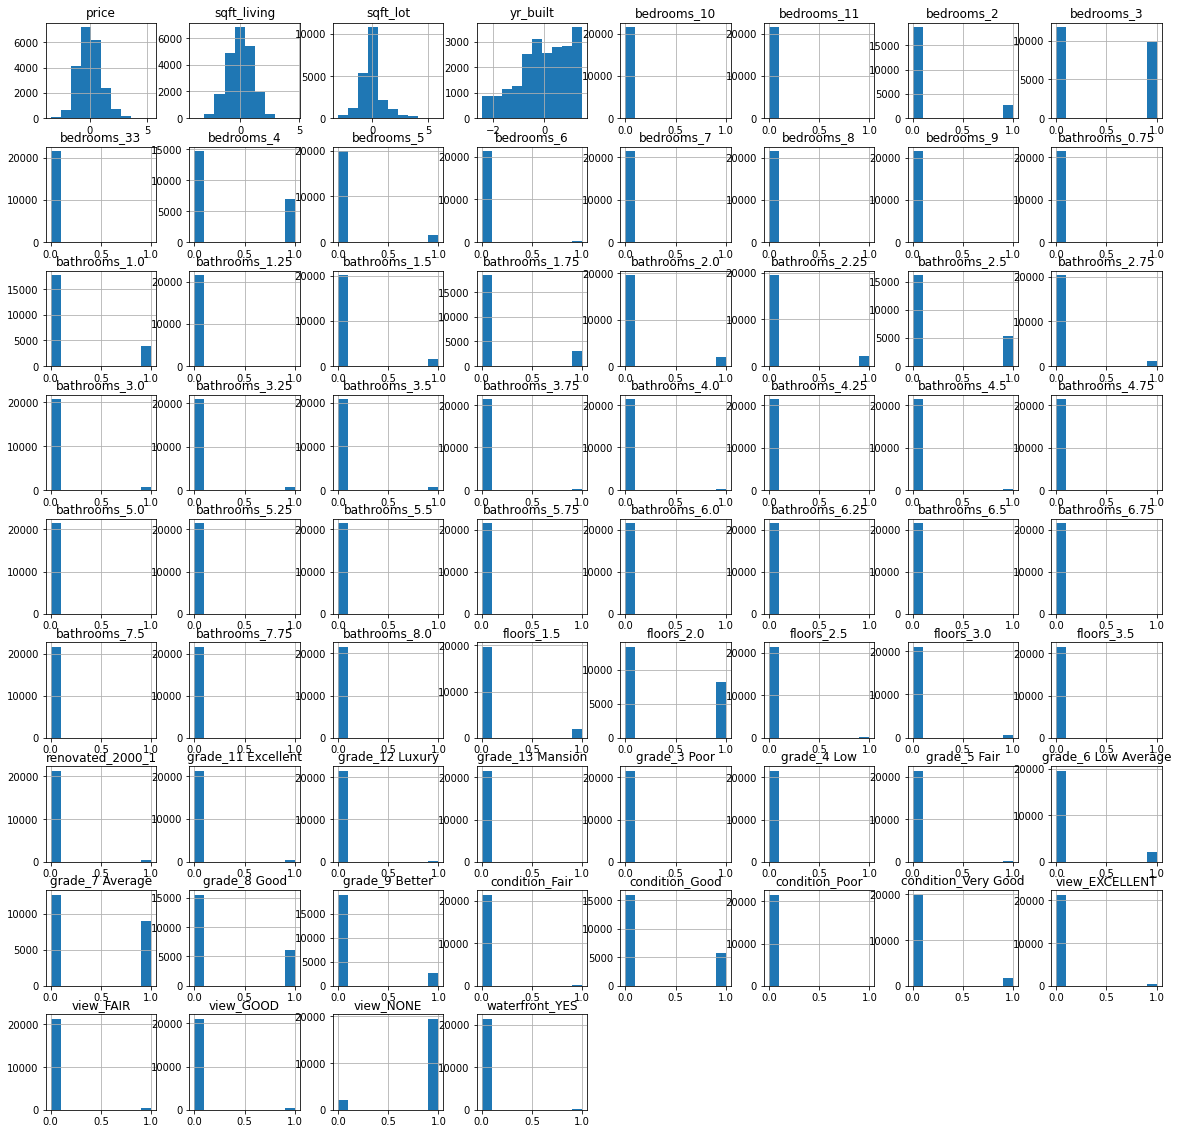

In [24]:
final_df.hist(figsize = (20,20));

In [25]:
final_df.to_csv('./data/preprocessed.csv')

## Modeling Data
Now we can preprocess our cleaned data and further explore features in order to prepare for modeling:

[Data Modeling Notebook](./kc_data_modeling.ipynb)